# K-Means

### Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn import cluster as ct
from sklearn import decomposition as dc
import warnings

warnings.filterwarnings("ignore")

### Importar bases de dados

In [2]:
df = pd.read_csv('../datasets/clusterizacao/X_dataset.csv')


### ELBOW METHOD

In [3]:
clusters = np.arange( 2, 11, 1 )
rd=42
n_init = 10
ss_list = []
inertia_list = []

for c in clusters:
    # define
    kmeans = ct.KMeans( n_clusters=c, init='random', n_init=n_init, random_state=rd )

    # Treinamento
    labels = kmeans.fit_predict( df )

    # performance
    ss_avg = mt.silhouette_score( df, labels )

    # add silhouette to list
    ss_list.append( ss_avg )

    inertia_list.append(kmeans.inertia_)

    print(f"For n_clusters = {c} - The Average SS = {ss_avg}")


  File "c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


For n_clusters = 2 - The Average SS = 0.213219480988304
For n_clusters = 3 - The Average SS = 0.23295918228054466
For n_clusters = 4 - The Average SS = 0.2118257221163883
For n_clusters = 5 - The Average SS = 0.2205526411661816
For n_clusters = 6 - The Average SS = 0.20040726179200827
For n_clusters = 7 - The Average SS = 0.1961667544958094
For n_clusters = 8 - The Average SS = 0.17660761040811715
For n_clusters = 9 - The Average SS = 0.1707165020550579
For n_clusters = 10 - The Average SS = 0.1726261535411044


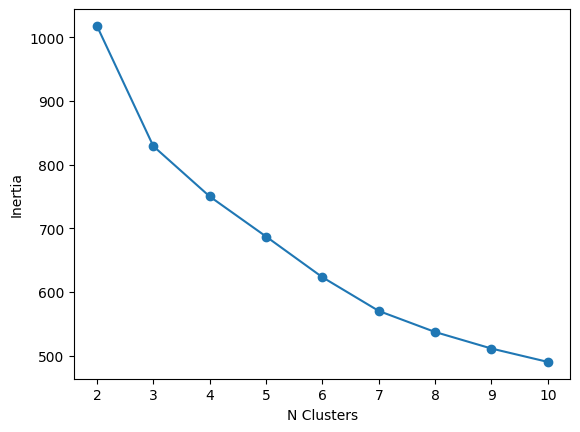

In [4]:
plt.plot( clusters, inertia_list, marker="o", label="Inertia")
plt.xlabel("N Clusters")
plt.ylabel("Inertia")
plt.show()

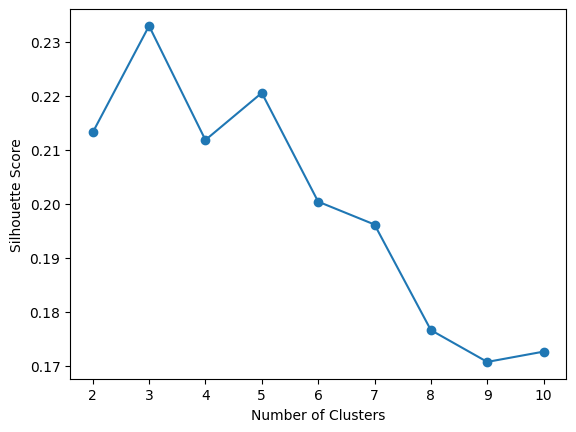

In [5]:
plt.plot( clusters, ss_list, marker='o')
plt.xlabel( 'Number of Clusters' );
plt.ylabel( 'Silhouette Score' );

### Modelo Final

In [6]:
# Agruapmentos
c = ss_list.index( max( ss_list ) ) + 2
print( 'Best K: {}'.format( c ) )

Best K: 3


In [7]:
# Treinando e Prevendo
kmeans = ct.KMeans(n_clusters=c, init="random", n_init=n_init, random_state=rd )
labels = kmeans.fit_predict(df)

# Testando performance
final_ss = mt.silhouette_score(df, labels)
final_ss

0.23295918228054466

### PCA

Text(0.5, 1.0, 'K-Means')

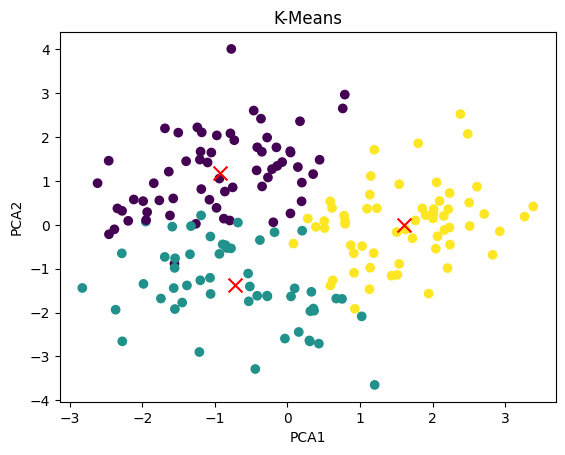

In [8]:
# Reduce X
pca = dc.PCA(n_components=2)
reduced_X = pca.fit_transform(df)
reduced_X = pd.DataFrame(data=reduced_X, columns=["PC1", "PC2"])
reduced_X.head()

# reduced centers
centers = pca.transform(kmeans.cluster_centers_)
centers

# Scatter Plot
plt.scatter(reduced_X["PC1"], reduced_X["PC2"], c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=100, c="red")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("K-Means")

### SALVANDO RESULTADOS

In [9]:
train_metrics = {
    "Algoritimo": "K-Means",
    "N Clusters": c,
    "Average Silhouette Score": np.round(final_ss, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv("./clustering_metrics.csv")